In [0]:

# https://www.pyimagesearch.com/2019/07/29/cyclical-learning-rates-with-keras-and-deep-learning/
# https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1
# https://www.pyimagesearch.com/2019/07/22/keras-learning-rate-schedules-and-decay/


from __future__ import print_function
import keras

from keras.datasets import cifar10,mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
import os
import numpy as np

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
if len(x_train.shape)<4:
  x_train=x_train[:,:,:,np.newaxis]
  x_test=x_test[:,:,:,np.newaxis]
num_classes=10


model = Sequential(name="SimpleConv")
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(28,28,1),activation="relu",name="c1"))
model.add(MaxPooling2D(pool_size=(2, 2),name="mp1"))
model.add(Conv2D(64, (3, 3), strides=(2,2), padding='same',activation="relu",name="c2"))
model.add(MaxPooling2D(pool_size=(2, 2),name="mp2"))
model.add(Flatten())
model.add(Dense(512,activation="relu",name="fc1"))
model.add(Dense(num_classes,name="fc2",activation="softmax"))

print(model.summary())






Model: "SimpleConv"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
c1 (Conv2D)                  (None, 28, 28, 32)        320       
_________________________________________________________________
mp1 (MaxPooling2D)           (None, 14, 14, 32)        0         
_________________________________________________________________
c2 (Conv2D)                  (None, 7, 7, 64)          18496     
_________________________________________________________________
mp2 (MaxPooling2D)           (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 576)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 512)               295424    
_________________________________________________________________
fc2 (Dense)                  (None, 10)                5

In [0]:
from keras.callbacks import LearningRateScheduler


class FixedLearningRate:
  def __init__(self,lr):
    self.lr=lr
  def __call__(self,epoch):
    return self.lr

class HardcodedStepDecay:
  def __init__(self):
    pass
  def __call__(self, epoch):
    if epoch<20:
      return 0.01
    elif epoch <40:
      return 0.001
    else:
      return 0.0001

class StepDecay:
  def __init__(self,initial_lr,decay):
    self.lr=initial_lr
    self.decay=decay
  def __call__(self, epoch):
    self.lr *= (1. / (1. + self.decay * epoch))
    return self.lr




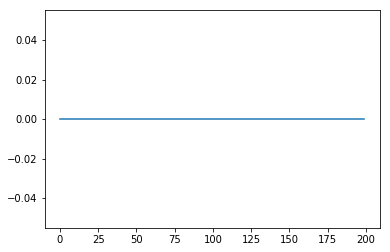

In [0]:

lr_scheduler=FixedLearningRate(5)
lr_scheduler=HardcodedStepDecay()
lr_scheduler=StepDecay(initial_lr=0.1,decay=0.001)


def plot_lr_scheduler(lr_scheduler,epochs=200):
  import matplotlib.pyplot as plt
  x=np.arange(epochs)
  y=np.zeros_like(x)
  for i in range(epochs):
    y[i]=lr_scheduler(float(i))
  plt.plot(x,y)

plot_lr_scheduler(lr_scheduler)




In [0]:
lr_callback=LearningRateScheduler()

initial_lr=0.01
opt = SGD(lr=initial_lr, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(x_train,y_train,batch_size=32,epochs=30,callbacks=[lr_callback])